In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

In [2]:

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [20]:
%matplotlib widget

In [44]:
Year = "2022"
Month = "10"
Day = "18"
BeadNumber = 1
folder = r"/home/data_transfer/data_from_windows/"+ Year + Month + Day
Data_File_Number = 30

In [45]:
fname = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/InitialTest_%d.h5" % Data_File_Number
fname = folder+"/Bead"+str(BeadNumber)+"/Discharge"+"/Discharge_%d.h5" % Data_File_Number

#fname="/home/data_transfer/data_from_windows/20221006/InitialTest_11.h5"


In [46]:
BDF = BeadDataFile.BeadDataFile(fname)



OSError: Unable to open file (unable to open file: name = '/home/data_transfer/data_from_windows/20221018/Bead1/Discharge/Discharge_30.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [47]:
BDF.z_set

2783950.0

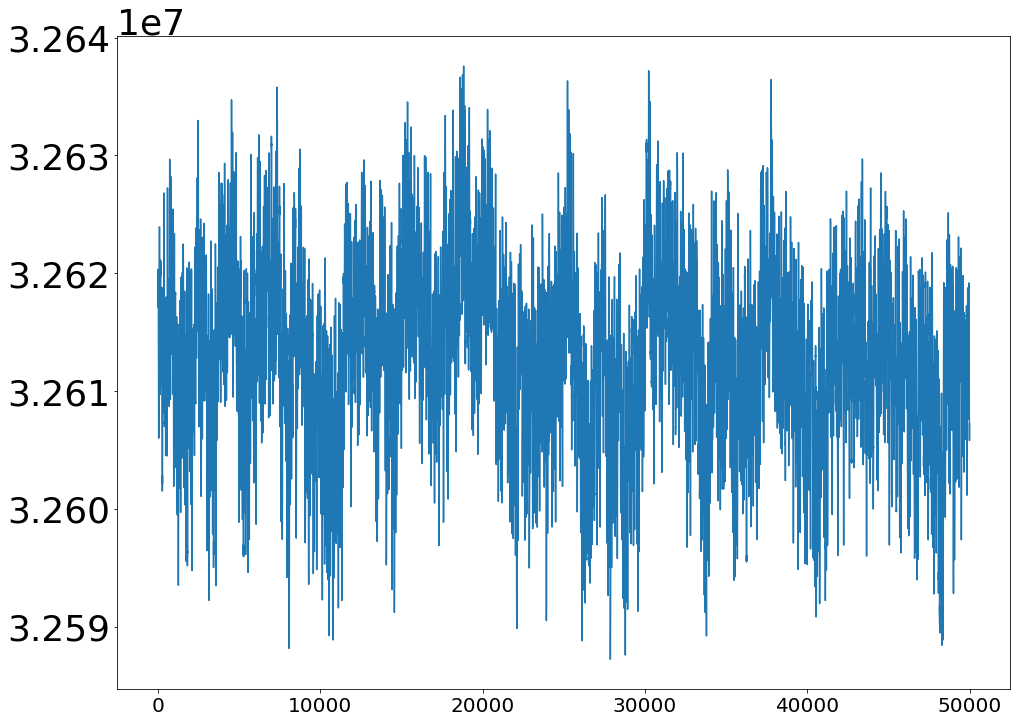

In [43]:
plt.plot(BDF.xyz2[2])

In [6]:
f = h5py.File(fname,'r')
pos_data = np.array(f['pos_data'])
quad_data = np.array(f['quad_data']) 

In [7]:
amp = quad_data.reshape(-1,12).T[:5]
phase = quad_data.reshape(-1,12).T[5:10]
#amp = np.roll(amp,-1)
#phase = np.roll(phase,-1)


In [48]:
old = np.mean(amp[4])

In [42]:
new = np.mean(amp[4])

0.41573560776283536

In [39]:
right = amp[0] + amp[1]
left = amp[2] + amp[3]
top = amp[0] + amp[2]
bottom = amp[1] + amp[3]
quad_sum = right + left
x2 = (right - left)/quad_sum
y2 = (top - bottom)/quad_sum    
z2 = phase[0]   
xyz2 = np.array([x2, y2, z2])

In [40]:
fsamp = 5000
res=5000
data=xyz2
data_det=signal.detrend(data)
y_1000=data_det[1]
z_1000=1e-5*data_det[2]

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
ypsd, freqs = matplotlib.mlab.psd(y_1000, Fs = fsamp, NFFT = res)
zpsd, freqs = matplotlib.mlab.psd(z_1000, Fs = fsamp, NFFT = res)

1.0 maximum x
1.0 maximum y
1.9224054347069125e-06 minimum x
4.5937511587051454e-08 minimum y
/home/data_transfer/data_from_windows/20221006/Bead1/InitialTest/Data2.png


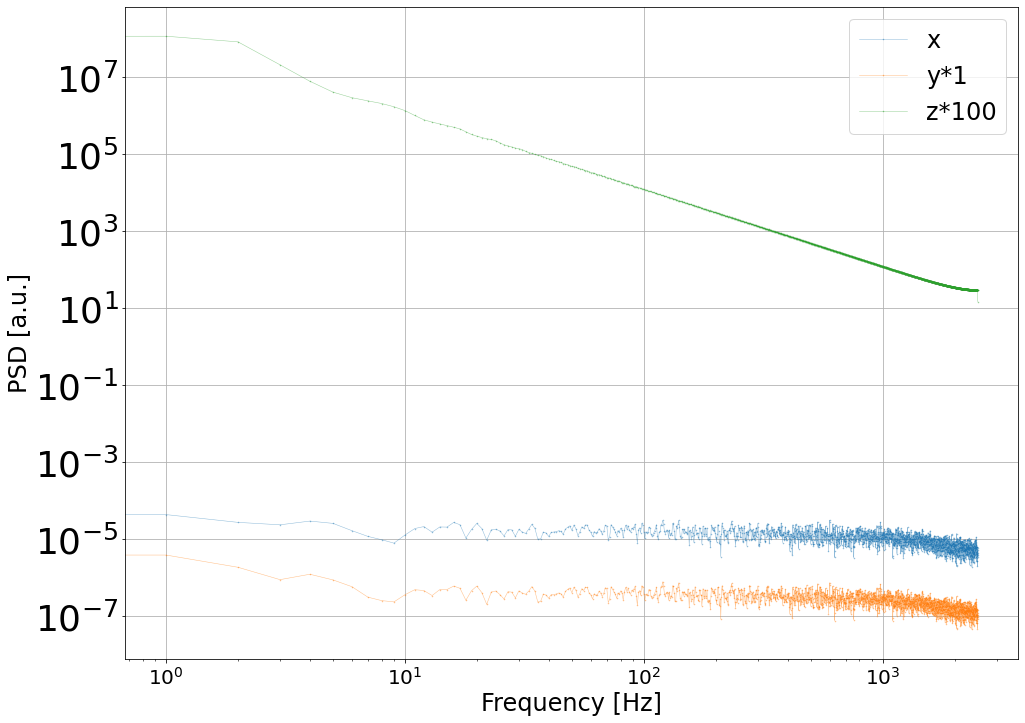

In [23]:
_,ax = plt.subplots()
ax.loglog(freqs, xpsd, '.-', label="x",markersize=1,linewidth=0.5,alpha=0.5)
ax.loglog(freqs, ypsd, '.-', label="y*1",markersize=1,linewidth=0.5,alpha=0.5)
ax.loglog(freqs, zpsd, '.-', label="z*100",markersize=1,linewidth=0.5,alpha=0.5)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
#plt.xlim(1,2500)
#plt.ylim(1e6,1e10)
plt.grid(True)
print(freqs[np.argmax(xpsd)], "maximum x")
print(freqs[np.argmax(ypsd)], "maximum y")
print(np.min(xpsd), "minimum x")
print(np.min(ypsd), "minimum y")

ofname=folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.png" % Data_File_Number
#ofname="picture.png"
#ofname=folder+"/NoBead"+"/InitialTest"+"/Data%d.png" % Data_File_Number

print(ofname)
#plt.savefig(ofname, dpi =300)

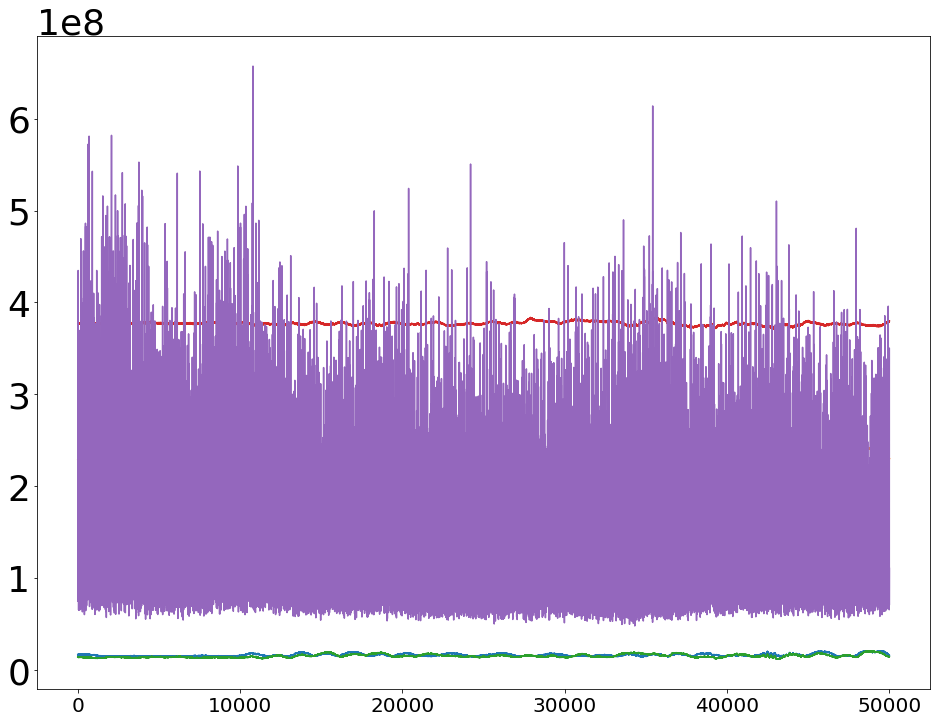

In [18]:
for i in range(5):
    plt.plot(amp[i])

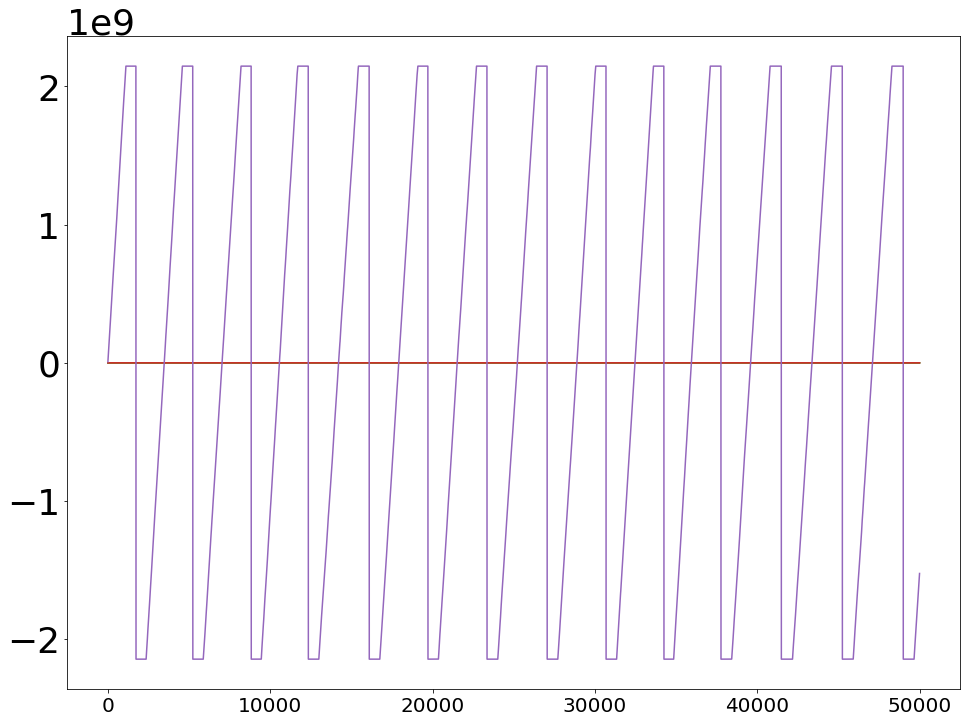

In [19]:
for i in range(5):
    plt.plot(phase[i])

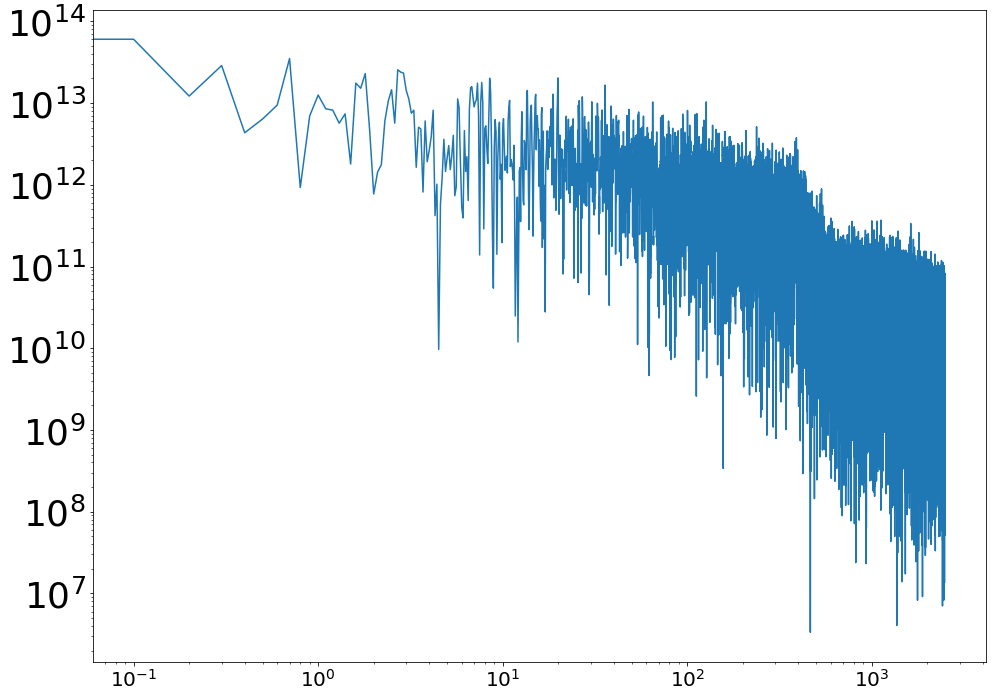

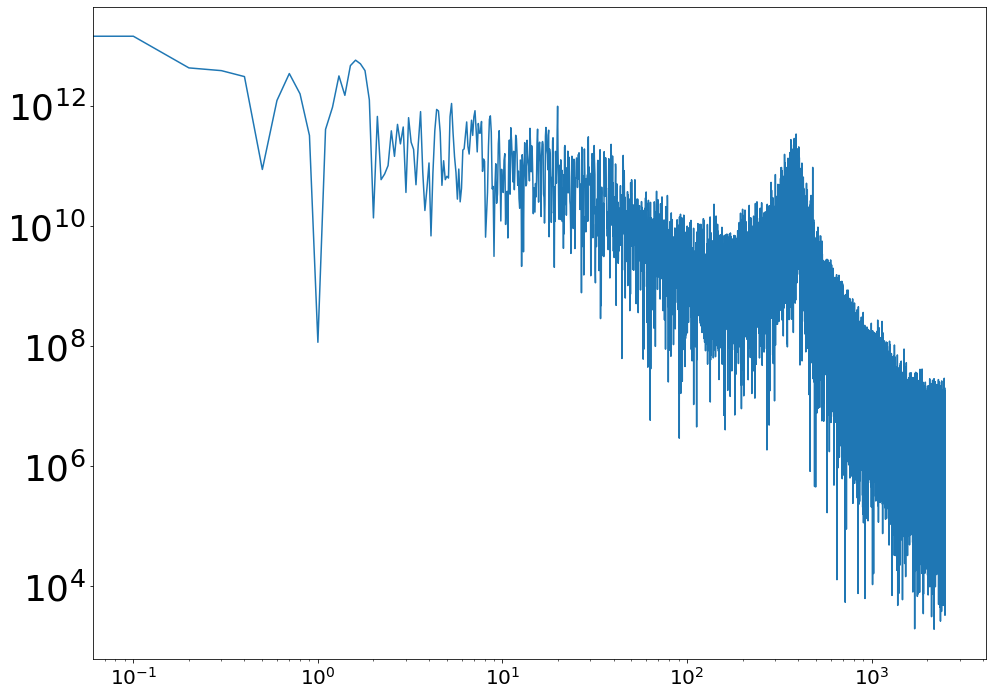

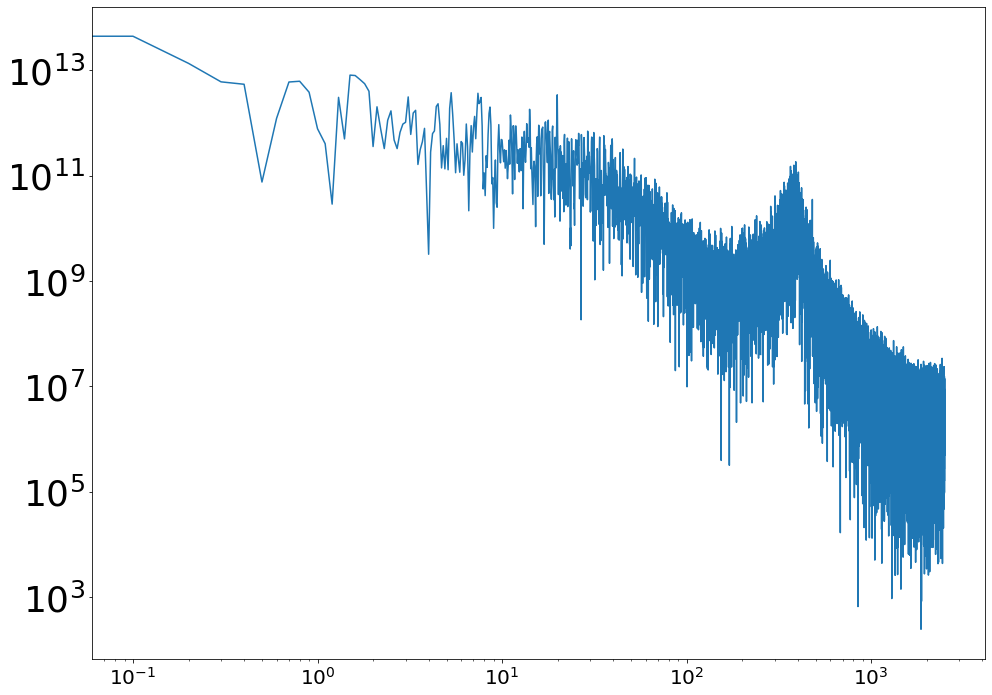

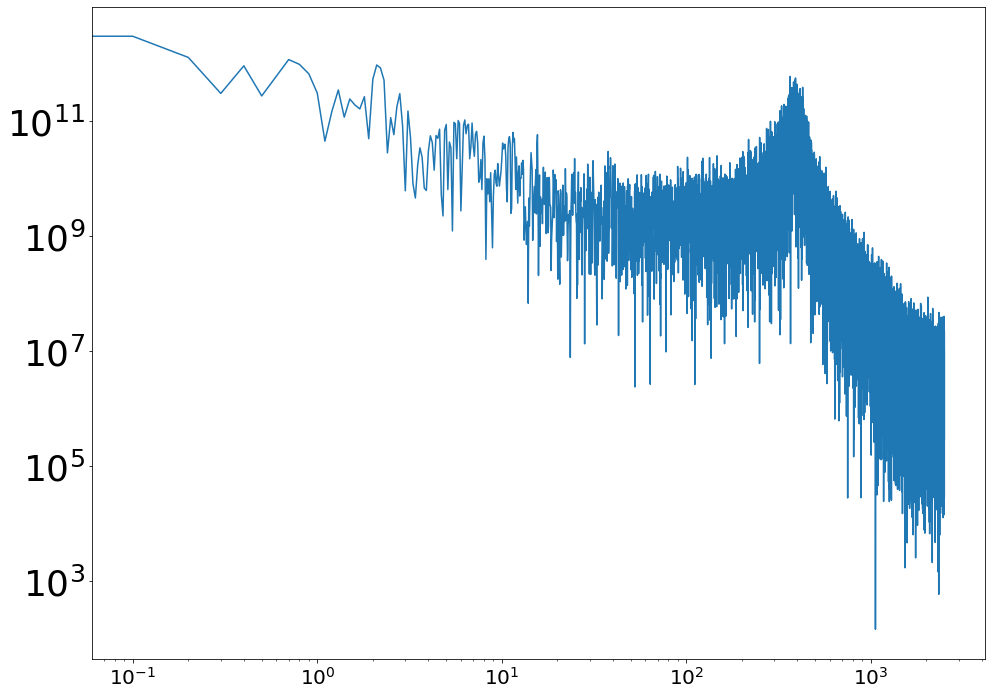

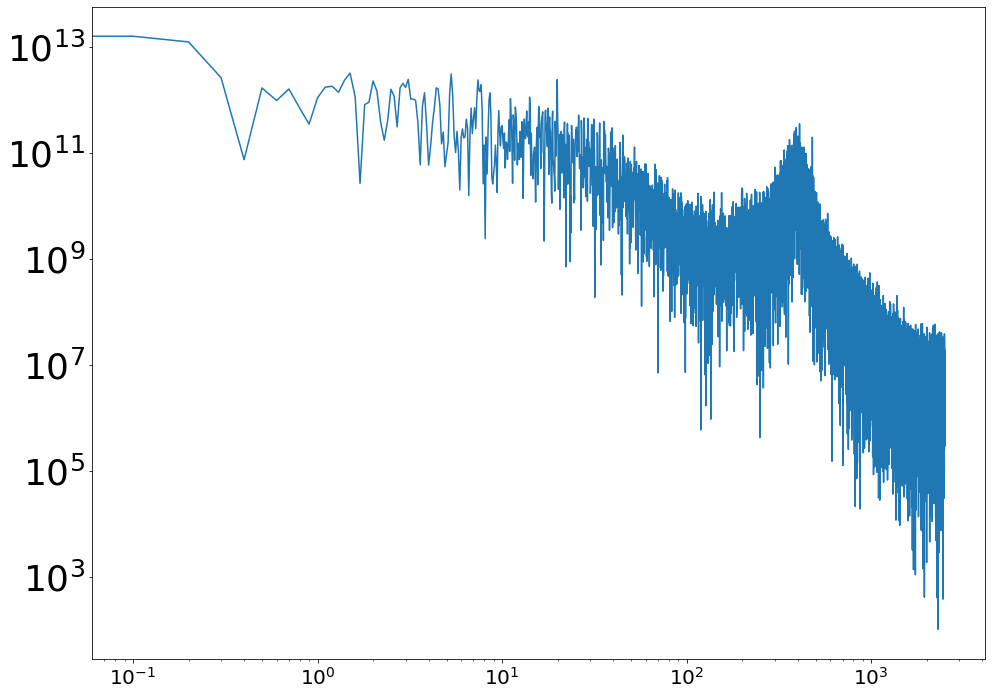

In [47]:
for i in range(5):

    data_det=signal.detrend(amp[i])
    psd, freqs = matplotlib.mlab.psd(data_det, Fs = fsamp, NFFT = res)
    plt.loglog(freqs,psd)
    plt.show()

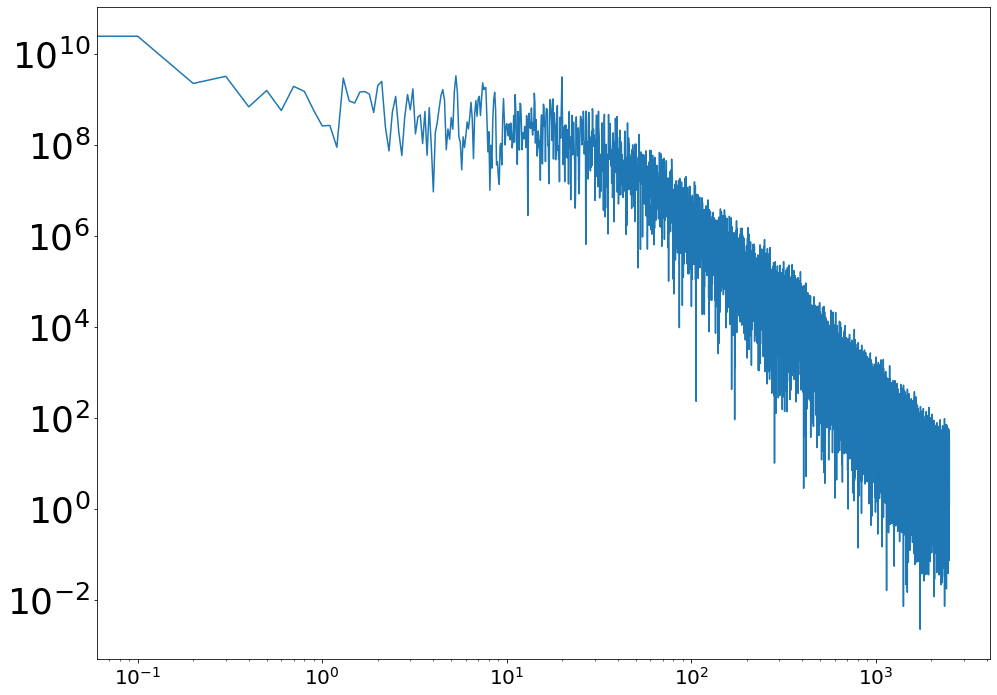

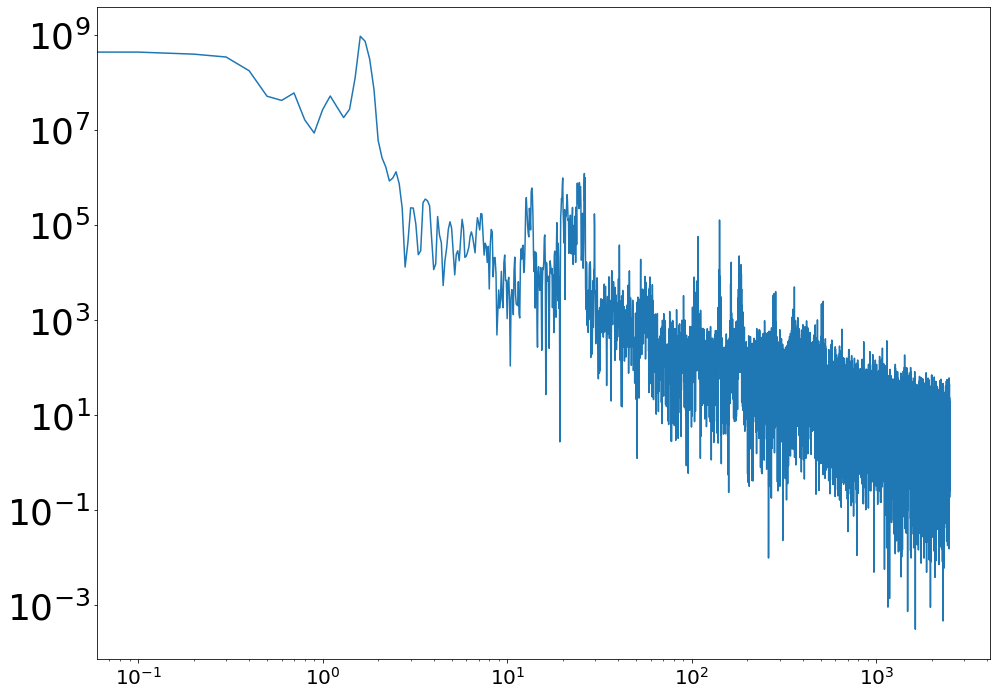

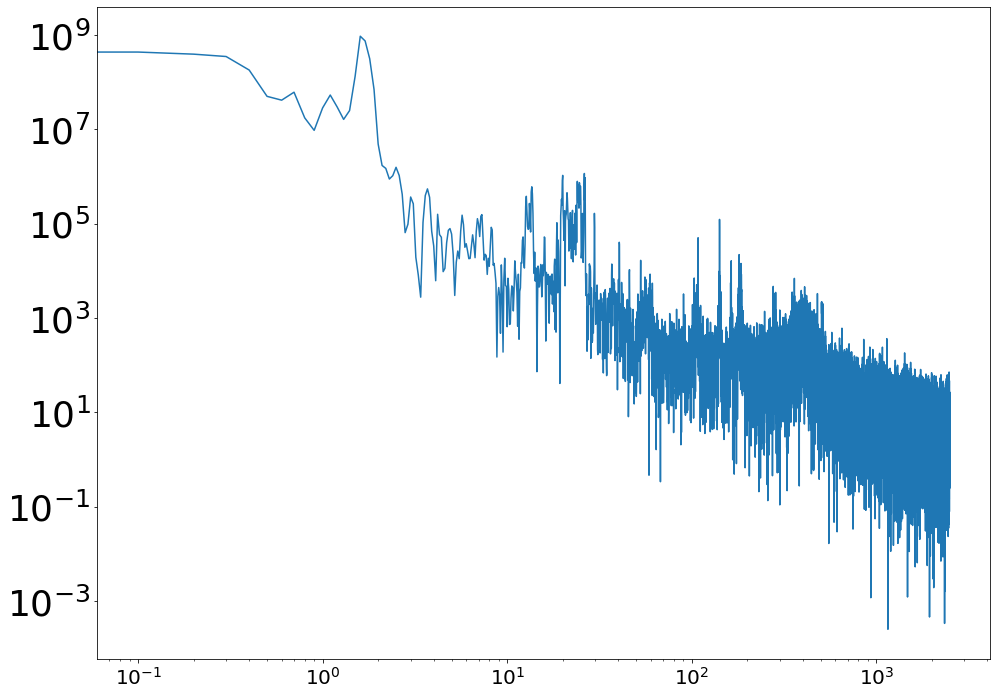

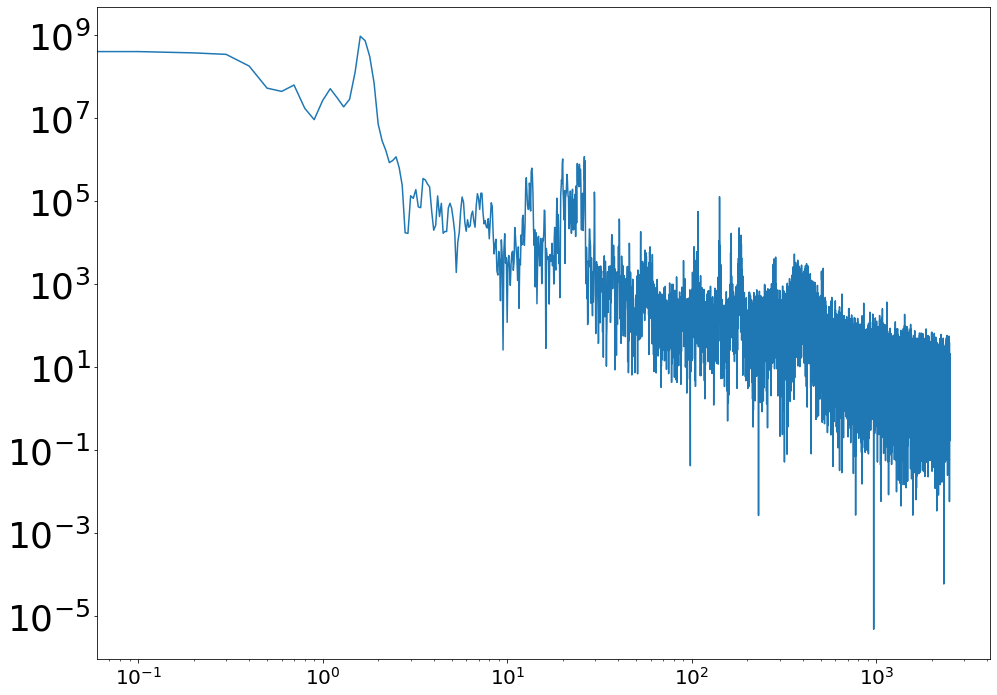

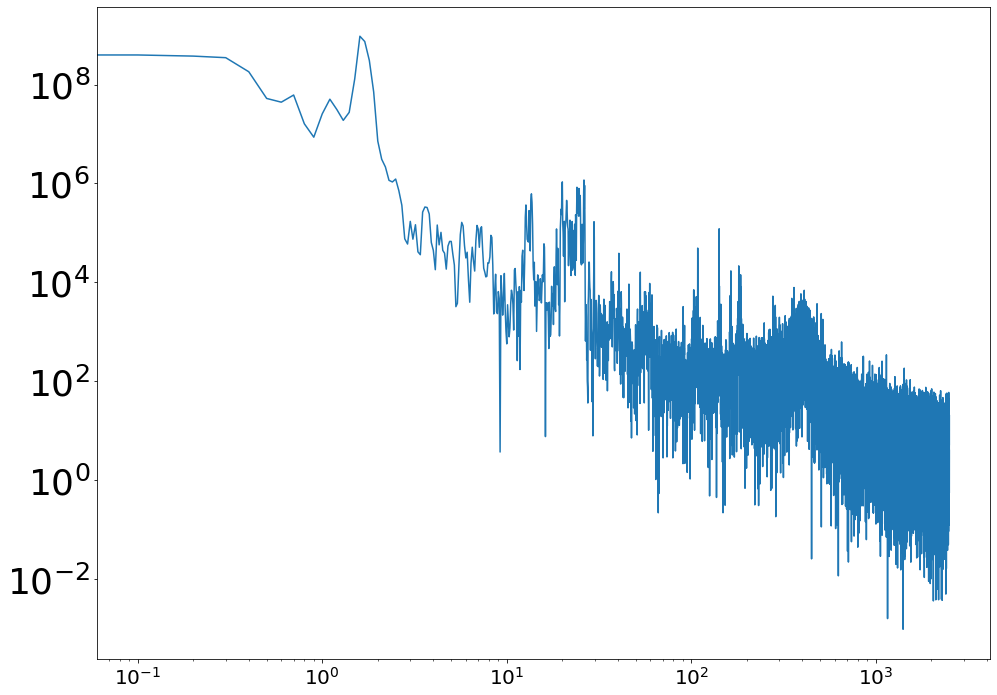

In [46]:
for i in range(5):
    fsamp = 5000
    res=50000
    data_det=signal.detrend(phase[i])
    psd, freqs = matplotlib.mlab.psd(data_det, Fs = fsamp, NFFT = res)
    plt.loglog(freqs,psd)
    plt.show() 